In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv("datasets/mnsit.csv")
x = data.drop('label',axis=1)
y = data['label']

In [8]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

In [10]:
print(np.std(x_std))

0.9502953354035759


In [65]:
x_s = x_std[0:500,:]
y_s = y[0:500]

In [66]:
print(x_s.shape)
print(y_s.shape)

(500, 784)
(500,)


## t-SNE

In [67]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2,random_state =0)

#DEFAULT VALUES
# perplexity = 30
# epsilon(learn_rate) = 200
# steps = 1000
# n_components : dimensions of data -> here it is 2D

In [68]:
tsne_data = model.fit_transform(x_s)

In [69]:
print("TSNE Data: ",tsne_data.shape)
print("Data: ",x_s.shape)
print("Label: ",y_s.shape)

print(tsne_data.T.shape)

TSNE Data:  (500, 2)
Data:  (500, 784)
Label:  (500,)
(2, 500)


### Plot Results

In [74]:
print(tsne_data[:2])
# tsne_data = np.vstack((tsne_data.T,y_s)).T
tsne_data = np.hstack((tsne_data,[1*500]))
tsne_df = pd.DataFrame(tsne_data,columns=("Dim 1","Dim 2","Label"))

[[10.68098   -2.3080678]
 [14.992647  31.955017 ]]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [50]:
print(tsne_data.shape)
print(tsne_data[:2])

(1000, 3)
[[  1.00450456  14.97686768   1.        ]
 [ 19.4573822  -35.80516815   0.        ]]


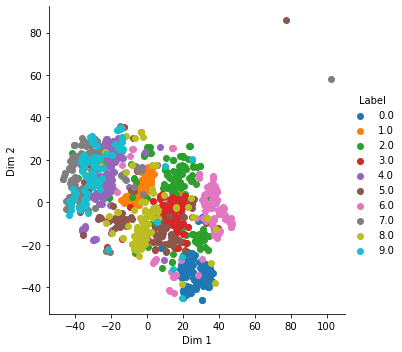

In [51]:
sns.FacetGrid(tsne_df,hue='Label',height=5).map(plt.scatter,"Dim 1","Dim 2").add_legend()

In [73]:
a = [1,2,3]
b = [4,5,6]
print(np.hstack((a,b)))
print()
print(np.vstack((a,b)))

[1 2 3 4 5 6]

[[1 2 3]
 [4 5 6]]
